<Figure size 640x480 with 0 Axes>

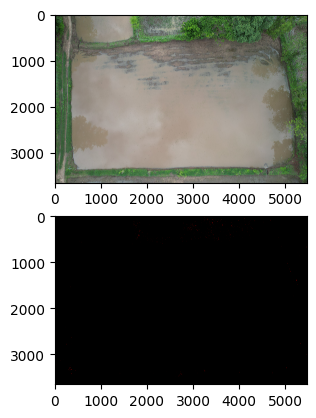

In [4]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 


def Canny_detector(img, weak_th=None, strong_th=None):
    """
    Applies Canny edge detection to the input image.

    Args:
    - img: Input image.
    - weak_th: Weak threshold for double thresholding step.
    - strong_th: Strong threshold for double thresholding step.

    Returns:
    - result_img: Image with strong edges marked in red and other areas in white.
    """
    # Conversion of image to grayscale
    if len(img.shape) == 3:  # Ensure input image is grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)

    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    # Conversion of Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Setting default thresholds if not provided
    mag_max = np.max(mag)
    if weak_th is None:
        weak_th = mag_max * 0.1
    if strong_th is None:
        strong_th = mag_max * 0.5

    # Apply double thresholding
    _, strong_ids = cv2.threshold(mag, strong_th, 255, cv2.THRESH_BINARY)
    strong_ids = strong_ids.astype(np.uint8)

    # Create a result image
    result_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    result_img[strong_ids > 0] = [0, 0, 255]  # Strong edges in red

    return result_img


frame = cv2.imread('02_02.JPG') 

# calling the designed function for 
# finding edges 
canny_img = Canny_detector(frame) 

# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 
plots[1].imshow(cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB)) 
plt.show() 
